In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller, kpss

## Data import

In [2]:
covid=pd.read_csv(r'E:\Documents\Kaggle Projects\Covid 19 time series prediction\train.csv', sep=',')
covid.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


## Data Preprocessing

### Province/state has all nan values

In [3]:
covid.isnull().sum()

Id                   0
Province/State    9240
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

### Dropping Provice/state column

In [4]:
covid=covid.drop(columns=['Province/State','Country/Region','Lat','Long','Id'])

In [5]:
covid.dtypes

Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

### Converting object to date and time format

In [6]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [7]:
covid.dtypes

Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [8]:
covid.head()

,Date,ConfirmedCases,Fatalities
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,0.0,0.0
3,2020-01-25,0.0,0.0
4,2020-01-26,0.0,0.0


In [9]:
covid = covid.sort_values('Date', ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



[Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00')]

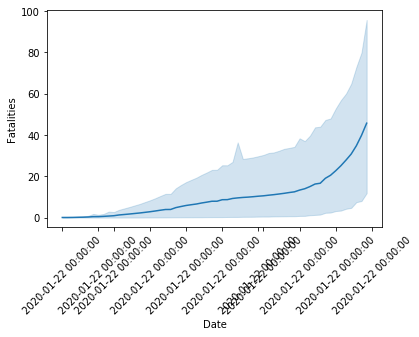

In [10]:
ax = sns.lineplot(x="Date", y="Fatalities",markers=True, data=covid)
ax.set_xticklabels(covid.Date,rotation=45)

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.swarmplot(x="Date", y="Fatalities",color='blue', data=covid)
ax.set_xticklabels(covid.Date,rotation=90)
ax = sns.relplot(x="Date", y="ConfirmedCases",kind='line',color='red', data=covid)
ax.set_xticklabels(covid.Date,rotation=90)



### Date is indexed for rolling mean and standard deviation

In [12]:
covidindexed=covid.set_index(['Date'])

# Testing Stationary of the data

### Rolling statistics

In [13]:
rolmean=covidindexed.rolling(30).mean()
rolstd=covidindexed.rolling(30).mean()


[Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00'),
 Text(0, 0, '2020-01-22 00:00:00')]

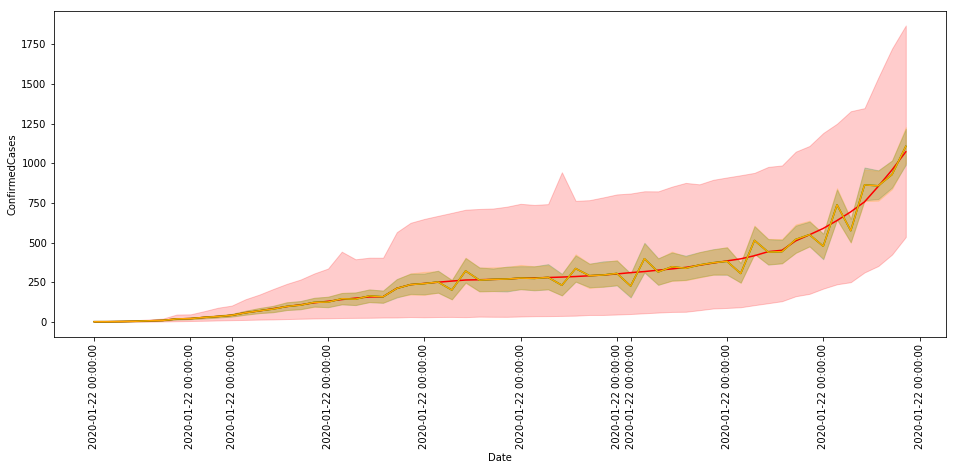

In [20]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="Date", y="ConfirmedCases",markers=True, dashes=False,color='red', data=covid)
ax = sns.lineplot(x=rolmean.reset_index().Date, y=rolmean['ConfirmedCases'].values,markers=True,color='green', data=rolmean)
ax = sns.lineplot(x=rolstd.reset_index().Date, y=rolstd['ConfirmedCases'].values,markers=True,color='orange', data=rolstd)
ax.set_xticklabels(covid.Date,rotation=90)


In [15]:
dftest=adfuller(covidindexed['ConfirmedCases'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','#Lags used','# of obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

Test statistics         -130.968645
p-value                    0.000000
#Lags used                 0.000000
# of obs               17039.000000
Critical Value(1%)        -3.430734
Critical Value(5%)        -2.861710
Critical Value(10%)       -2.566860
dtype: float64


In [16]:
rolmean['ConfirmedCases'].values



array([          nan,           nan,           nan, ..., 1325.26666667,
       1320.16666667, 1101.06666667])